In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from PIL import Image
import requests
from io import BytesIO

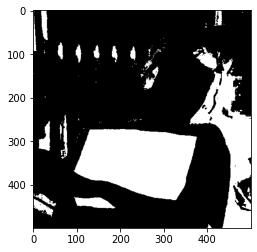

In [34]:
# open chandler holding image
chandler_holding = cv2.imread('chandler_template.jpg')

#threshold the image to get black mask
gray = cv2.cvtColor(chandler_holding, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY_INV)
#plot threshold
plt.imshow(thresh, cmap='gray')
plt.show()

Chandler holding "This Is Happening" by LCD Soundsystem🎶
Is it correct?(y/n)


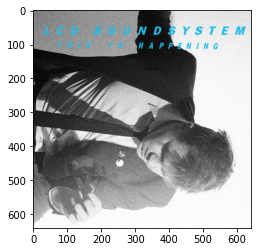

In [22]:
SPOTIPY_CLIENT_ID = 'ffe90464b053431085395bfe631eec57'
SPOTIPY_CLIENT_SECRET = 'cc67299c1438475d9dbf4ebbea85436a'

spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET))

name = input('Insert the name of the album')
results = spotify.search(q='album:' + name, type='album')
items = results['albums']['items']
#print(items)
if len(items) > 0:
    for album in items:
        url = album['images'][0]['url']
        desc = 'Chandler holding "'+album['name']+'" by ' +album['artists'][0]['name']+'\U0001f3b6'
        print(desc)
        print('Is it correct?(y/n)')
        a = input()
        if a=='y':
            break 

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)
plt.imshow(img)
plt.show()

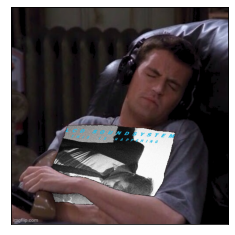

In [35]:
points = [[129-10, 274-10],[377+10, 289-10],[328, 495],[49, 477]]
points = np.array(points, dtype=np.int32)

# warp img to fit these points
h, status = cv2.findHomography(np.array([[0, 0], [img.shape[0], 0], [img.shape[0], img.shape[1]], [0, img.shape[1]]]),points)
warped_img = cv2.warpPerspective(img, h, (chandler_holding.shape[0], chandler_holding.shape[1]))

# apply the threshold mask to the warped image
warped_img = cv2.bitwise_and(warped_img, warped_img, mask=thresh)
# apply the inverse of the threshold mask to the original image
chandler_holding = cv2.bitwise_and(chandler_holding, chandler_holding, mask=cv2.bitwise_not(thresh))
# convert to rgb
chandler_holding = cv2.cvtColor(chandler_holding, cv2.COLOR_BGR2RGB)
# add the warped image to the original image
final_img = cv2.add(warped_img, chandler_holding)
# plot warped image
plt.imshow(final_img)
# remove ticks
plt.xticks([])
plt.yticks([])
plt.show()
